# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Yuval 7752
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [12]:
import numpy as np 
import scipy
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data= pd.read_csv('titanic_train.csv')
test_data= pd.read_csv('titanic_test.csv')
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)
print(train_data.head())
print(test_data.head())

Train set shape: (712, 8)
Test set shape: (179, 8)
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [4]:
print(train_data.describe())
print(test_data.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

C:\Users\yuval\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


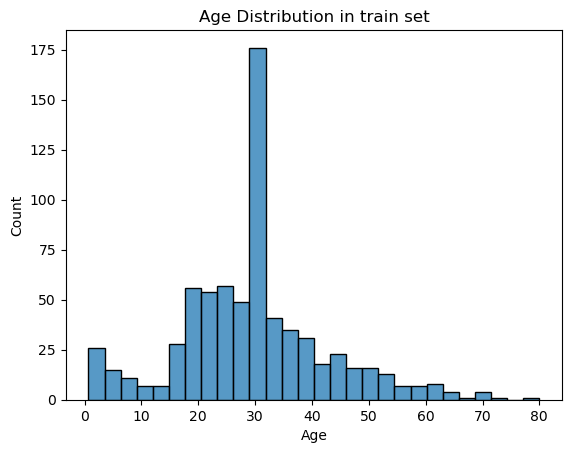

In [5]:
sns.histplot(train_data['Age'])
plt.title('Age Distribution in train set')
plt.show()

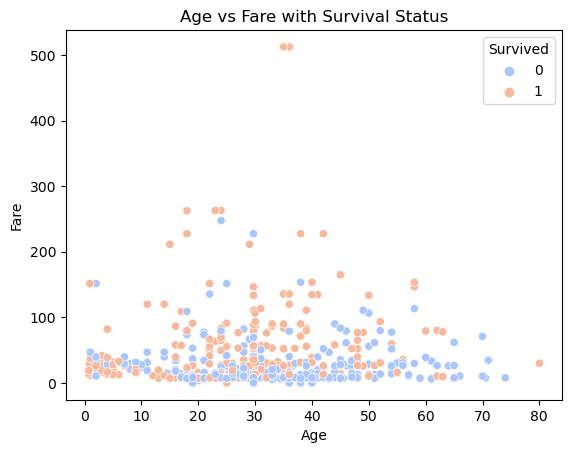

In [6]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, palette='coolwarm')
plt.title('Age vs Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [22]:
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

scaler = StandardScaler()
x_scaled= scaler.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
accuracy_default = accuracy_score(y_valid, y_pred)
report_default = classification_report(y_valid, y_pred, output_dict=True)
print("Accuracy:", accuracy_default)
print("Classification Report:\n", classification_report(y_valid, y_pred))

Accuracy: 0.7972027972027972
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        79
           1       0.80      0.73      0.76        64

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



In [23]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results_summary = results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'rank_test_score']]
results_summary_sorted = results_summary.sort_values(by='rank_test_score')

print("Grid Search Results:")
print(results_summary_sorted)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid Search Results:
   param_n_estimators param_max_depth param_min_samples_split  \
14                150              10                       5   
13                100              10                       5   
11                150              10                       2   
12                 50              10                       5   
10                100              10                       2   
7                 100            None                      10   
25                100              20                      10   
16                100              10                      10   
21                 50              20                       5   
3                  50            None                       5   
9                  50              10                       2   
24                 50              20                      10   
17                150              10                      10   
6      

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [24]:
best_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

Training Accuracy: 0.9244288224956063
Training Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       352
           1       0.95      0.84      0.89       217

    accuracy                           0.92       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.92      0.92       569



## Part 5 - Apply on test and show model performance estimation

In [30]:
X_test = test_data.drop(columns=['Survived']) 
X_test_scaled = scaler.fit_transform(X_test)
#y_test_pred = best_model.predict(X_test_scaled)
y_test_pred=model.predict(X_test_scaled)
results = pd.DataFrame({  
    'Survived': y_test_pred
})
print(results.head())
y_test_true = test_data['Survived']
test_report = classification_report(y_test_true, y_test_pred, output_dict=True)
print("Test Classification Report:")
print(classification_report(y_test_true, y_test_pred))

   Survived
0         0
1         1
2         0
3         0
4         1
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       118
           1       0.81      0.79      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179

